# Data Analysis with Base Python

-----

## Objectives

Perform a complete data analysis by...

* Ingesting a data file from the internet with bash
* Preparing data for analysis with Python
* Answering analysis questions with Python

# Data Ingestion

Ingestion refers to the process of moving data to a new destination for use in further analysis. For us, this involves three steps below:

1. Access the data source location
2. Create a new location to store the data
3. Move data from the source location to the storage location

## Access the Data

For this activity, we will be analyzing property sales data for King County, WA. You will need to navigate the [King County Assessor's](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) website to find the link to the data. We will ues this link to download the data - but don't do it yet.

**Activity**: Find the URL for the Real Property Sales data ([answer](https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip)). Is there anything you notice about the URL or data that might have implications as we proceed?

## Create a New Location to Store the Data

We will use bash to create a folder in this repository to store the data. If you are on a PC, you will need to open a terminal using PowerShell (or WSL) to run the commands below (can be done in [Windows Terminal](https://www.microsoft.com/en-us/p/windows-terminal/9n0dx20hk701)).

Here is a trick to run shell commands within this notebook: put an exclamation point at the beginning of a command. You can do this on Windows, too, but you will need to use Command Prompt syntax (e.g. `dir` instead of `ls`).

Alternatively, you can use a **cell magic** (yes, that's what it's really called). A cell magic at the top of a cell affects the interpretation of all commands in the cell. The `%%bash` cell magic runs the cell's commands in a bash subprocess.

In [1]:
!pwd

/Users/zachgreenberg/Documents/Flatiron/nyc-dc-ds-020121/Phase_1/data_analysis_python


In [2]:
## Inspect files in current working directory
!ls

data_analysis.ipynb


In [3]:
%%bash
pwd

/Users/zachgreenberg/Documents/Flatiron/nyc-dc-ds-020121/Phase_1/data_analysis_python


In [4]:
## Create a new `raw_data` directory
!mkdir raw_data

Let's reinspect our working directory. By typing `ls -l`, we are getting more information about all files and folders such as when things were created.

In [5]:
!ls -l

total 40
-rwxr-xr-x  1 zachgreenberg  staff  20217 Feb  8 11:50 data_analysis.ipynb
drwxr-xr-x  2 zachgreenberg  staff     64 Feb  8 18:26 raw_data


Let's also make sure that our new directory is empty!

In [6]:
!ls raw_data

## Download necessary data

There are two ways to download the data: Command Line Interface (CLI) and Graphical User Interface (GUI).

To do this via CLI, we will use the `curl` command to download the file to our computer. `curl` submits web requests for files to view or save. 

We add the `-o` flag to save the file, rather than just view it temporarily. Since we have to specify a file name with the `-o` flag, let's choose a new one with no spaces. 

By default, the download goes into the working directory - which is currently the root folder. Since we want the file to go into the `raw_data` folder we made, not the root folder, we first  change directory into the `raw_data` folder. Note that these both have to be in the same cell, since the shell starts and stops with each cell.

In [7]:
%%bash
cd raw_data
pwd
curl -o property_sales.zip https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip 

/Users/zachgreenberg/Documents/Flatiron/nyc-dc-ds-020121/Phase_1/data_analysis_python/raw_data


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125M  100  125M    0     0   331k      0  0:06:26  0:06:26 --:--:--  373k


Note that the change of folder doesn't persist to the next command we run

In [8]:
!pwd

/Users/zachgreenberg/Documents/Flatiron/nyc-dc-ds-020121/Phase_1/data_analysis_python


Let's inspect the contents of `raw_data` to verify that we have the data

In [9]:
!ls -l raw_data

total 262208
-rw-r--r--  1 zachgreenberg  staff  131414886 Feb  8 18:33 property_sales.zip


**Practice**: Use the CLI to download the permit dataset from the same source to the same location.

Alternatively, we can do all of this via GUI using your browser and operating system, as you're probably used to doing.

* Download the file from the website
* Create a new `raw_data` folder in your local repository
* Move the file to that folder
* Change the name to `property_sales.zip`

# Preparing Data for Analysis

We now have our data file in hand!! However, we still need to process it before we can analyze it to try to learn something about poperty sales. To process it, we'll do the following steps:

* Unzip the .zip file to get to the data file
* Inspect the raw data
* Read the data file to make a list object
* Clean up the list entries

## Unzip `raw_data/property_sales.zip`

Currently the data lives in a [`.zip`](http://cvs.bio.unc.edu/protocol/unzip-help/unzip-help.htm) file, which is a compressed file containing the actual data.

To uncompress the `.zip` file, we'll use the `zipfile` package in Python. This package provides a `ZipFile` object that can read and extract the file.

In [10]:
from zipfile import ZipFile
zf = ZipFile('raw_data/property_sales.zip', 'r')
zf.extractall('raw_data')
zf.close()

After unzipping `raw_data/Real Property Sales.zip`, we now have access to the `raw_data/EXTR_RPSale.csv`.

In [11]:
!ls -l raw_data/

total 1372992
-rw-r--r--  1 zachgreenberg  staff  566500366 Feb  8 19:03 EXTR_RPSale.csv
-rw-r--r--  1 zachgreenberg  staff  131414886 Feb  8 18:33 property_sales.zip


## Inspect the raw data

Let's inspect the first two rows in the `raw_data/EXTR_RPSale.csv` file

In [12]:
!head -n 2 raw_data/EXTR_RPSale.csv

**Discussion**: What can we learn about the data from this output?

## Reading `.csv` files

Comma Separated Values (CSV) files are common formats for storing tabular data  because they are relatively simple to create and read. Typically, the first row contains the column names separated by commas, also known as field names. Then, each line represents one row of tabular data, and each value in that row is separated by a comma. 

### Using the `csv` library

The [`csv` library](https://docs.python.org/3/library/csv.html) lets us process data from and to CSV files. We will use it to read each row in the `.csv` file and store its information in a more usable format. 

The [`csv.DictReader`](https://docs.python.org/3/library/csv.html#csv.DictReader) object is a file reader, reading each row and then mapping it to an [OrderedDict](https://docs.python.org/3/library/collections.html#collections.OrderedDict). It uses field names from the first row unless you specify otherwise. Since we know that the first row is the column headers, we can safely omit the `fieldnames` parameter knowing that `csv.DictReader()` will use the first row as the keys within each row.

In [13]:
import csv

sales = []

with open("raw_data/EXTR_RPSale.csv", encoding='ISO-8859-1') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        sales.append(row)

In [14]:
sales

[{'ExciseTaxNbr': '2687551',
  'Major': '138860',
  'Minor': '0110',
  'DocumentDate': '08/21/2014',
  'SalePrice': '245000',
  'RecordingNbr': '20140828001436',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
  'BuyerName': 'ALEXANDER APRIL                                   ',
  'PropertyType': '3',
  'PrincipalUse': '6',
  'SaleInstrument': '3',
  'AFForestLand': 'N',
  'AFCurrentUseLand': 'N',
  'AFNonProfitUse': 'N',
  'AFHistoricProperty': 'N',
  'SaleReason': '1',
  'PropertyClass': '8',
  'SaleWarning': ' '},
 {'ExciseTaxNbr': '3080093',
  'Major': '082204',
  'Minor': '9037',
  'DocumentDate': '10/27/2020',
  'SalePrice': '0',
  'RecordingNbr': '20201102000765',
  'Volume': '   ',
  'Page': '   ',
  'PlatNbr': '      ',
  'PlatType': ' ',
  'PlatLot': '              ',
  'PlatBlock': '       ',
  'SellerName': 'BALA RAJNI  

The contents of `sales[0]` is exactly the same as it was when we viewed the first two records of the `raw_data/EXTR_RPSale.csv` file from the command line.

In [15]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '0110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' '}

## Clean the Sale Prices

First, let's convert the sale prices from strings to numbers, so we can do arithmetic with them. For example, this will let us find the average price.

In [16]:
for sale in sales:
    # Save the document date to a variable
    string_price = sale["SalePrice"]
    
    # Cast the sale price to int and add to each dictionary element of sales
    sale["sale_price"] = int(string_price)

In [17]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '0110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000}

## Clean the Dates

Next we'll clean the dates so that we can easily get the month and year of each sale. 

### Using Python built-in methods

**Discussion**: How could you process the `sales` list to add numeric values for month and year to each entry?

<details>
    <summary>
        Answer
    </summary>
    
    for sale in sales:
        # Save the document date to a variable
        string_date = sale["DocumentDate"]
        
        # Extract the sale year and month from the string, and cast to int
        sale_year = int(string_date[6:10])
        sale_month = int(string_date[0:2])    
    
        # Add the sale year and month to each dictionary element of sales
        sale["sale_year"] = sale_year
        sale["sale_month"] = sale_month
</details>

In [24]:
for sale in sales:
    # Save the document date to a variable
    string_date = sale["DocumentDate"]

    # Extract the sale year and month from the string, and cast to int
    sale_year = int(string_date[6:10])
    sale_month = int(string_date[0:2])    

    # Add the sale year and month to each dictionary element of sales
    sale["sale_year"] = sale_year
    sale["sale_month"] = sale_month

In [25]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '0110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000,
 'sale_year': 2014,
 'sale_month': 8}

# Data Analysis

Now that you have a cleaned list with the property sales data, we can finally start to perform some data analysis.

## Question 1: What is the range of years for which we have sales data?

<details>
    <summary>
        Answer
    </summary>
    
    sale_years = [sale['sale_year'] for sale in sales]
    print(min(sale_years))
    print(max(sale_years))
</details>

In [28]:
## Your work here
sale_years = [sale['sale_year'] for sale in sales]
print(min(sale_years))
print(max(sale_years))

1900
2021


## Question 2: How many properties sold in 2020?

<details>
    <summary>
        Answer
    </summary>
    
    sale_years = [sale['sale_year'] for sale in sales]
    sale_years_2020 = [year for year in sale_years if year == 2020]
    len(sale_years_2020)
</details>

In [29]:
## Your work here
sale_years = [sale['sale_year'] for sale in sales]
sale_years_2020 = [year for year in sale_years if year == 2020]
len(sale_years_2020)

65484

## Question 3: What was the mean sale price in 2020?

<details>
    <summary>
        Answer
    </summary>
    
    sale_prices_2020 = [sale['sale_price'] for sale in sales if sale['sale_year'] == 2020]
    sum(sale_prices_2020)/len(sale_prices_2020)
</details>

In [30]:
## Your work here
sale_prices_2020 = [sale['sale_price'] for sale in sales if sale['sale_year'] == 2020]
sum(sale_prices_2020)/len(sale_prices_2020)

799276.4811098895

## Level Up: How many properties sold in each year?

For all dictionaries in `sales`, we want to count how many property sales occured in each year. Since the value in `sale_year` is an integer, we can use Python's built-in [`sorted`](https://docs.python.org/3/library/functions.html#sorted) function to transform the `Counter` object into a `list` of `tuples` - `(year, count)` which are sorted in ascending order by year.

In [31]:
from collections import Counter

sale_year_count = Counter([sale['sale_year'] for sale in sales])

In [32]:
sale_year_count

Counter({2014: 64297,
         2020: 65484,
         1991: 17525,
         2013: 69463,
         2019: 61560,
         1989: 17236,
         2003: 86309,
         2001: 71270,
         1983: 8607,
         1999: 75245,
         2006: 84738,
         1982: 6035,
         1987: 13575,
         2017: 68523,
         2012: 62463,
         1990: 16606,
         2009: 52393,
         2004: 89394,
         1998: 79581,
         2008: 51832,
         2000: 69878,
         2015: 68969,
         2007: 73267,
         2011: 56197,
         1997: 72093,
         2005: 93495,
         1992: 67862,
         2016: 70474,
         1996: 63657,
         1994: 64914,
         1993: 69459,
         2002: 77052,
         1995: 57982,
         2010: 54700,
         2018: 61224,
         1984: 9200,
         1988: 14190,
         2021: 3838,
         1986: 14627,
         1985: 10557,
         1974: 35,
         1976: 62,
         1966: 12,
         1981: 408,
         1958: 1,
         1971: 14,
         1

In [33]:
sale_year_count = sorted(sale_year_count.items())
sale_year_count

[(1900, 1),
 (1934, 1),
 (1951, 1),
 (1953, 1),
 (1954, 9),
 (1955, 3),
 (1956, 1),
 (1957, 3),
 (1958, 1),
 (1959, 4),
 (1960, 10),
 (1961, 5),
 (1962, 5),
 (1963, 9),
 (1964, 20),
 (1965, 11),
 (1966, 12),
 (1967, 18),
 (1968, 9),
 (1969, 20),
 (1970, 17),
 (1971, 14),
 (1972, 27),
 (1973, 45),
 (1974, 35),
 (1975, 43),
 (1976, 62),
 (1977, 99),
 (1978, 104),
 (1979, 124),
 (1980, 186),
 (1981, 408),
 (1982, 6035),
 (1983, 8607),
 (1984, 9200),
 (1985, 10557),
 (1986, 14627),
 (1987, 13575),
 (1988, 14190),
 (1989, 17236),
 (1990, 16606),
 (1991, 17525),
 (1992, 67862),
 (1993, 69459),
 (1994, 64914),
 (1995, 57982),
 (1996, 63657),
 (1997, 72093),
 (1998, 79581),
 (1999, 75245),
 (2000, 69878),
 (2001, 71270),
 (2002, 77052),
 (2003, 86309),
 (2004, 89394),
 (2005, 93495),
 (2006, 84738),
 (2007, 73267),
 (2008, 51832),
 (2009, 52393),
 (2010, 54700),
 (2011, 56197),
 (2012, 62463),
 (2013, 69463),
 (2014, 64297),
 (2015, 68969),
 (2016, 70474),
 (2017, 68523),
 (2018, 61224),
 (201

### Chart the Data

This `list` of `tuples` is helpful, but it takes a lot of effort to read it and make sense of the trends - let's visualize the results to make this easier. We'll do this with `matplotlib`, which you'll learn about in a future lesson.

In [34]:
from matplotlib import pyplot as plt

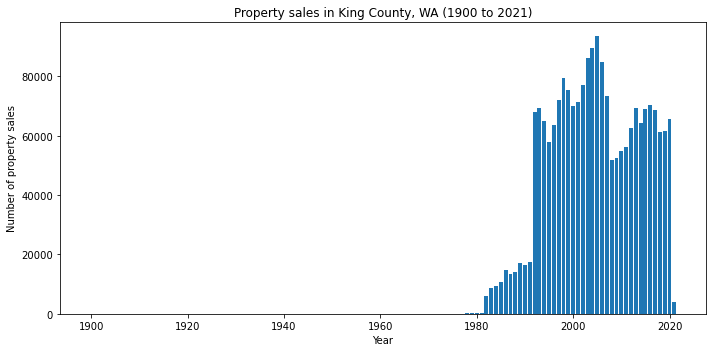

In [35]:
# create a figure and one plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# place data in a bar chart 
# where the x-axis is each year and 
# the y-axis is the number of sales per year
ax.bar(x=[sale[0] for sale in sale_year_count],
       height=[sale[1] for sale in sale_year_count])

# set axis labels
ax.set_xlabel("Year")
ax.set_ylabel("Number of property sales")

# give the bar chart a title
ax.set_title("Property sales in King County, WA (1900 to 2021)")

# display bar chart clearly
fig.tight_layout()

By the looks of our number of property sales over time bar plot, it looks like property sales in King County, WA started taking off in the 1980s. They continued climbing into the early 2000s. Despite the recession reducing the number of home sales in the late 2000s, it looks like they are continuing to climb.

### Save the Chart

Let's create a new `visuals` folder that will store all of our visuals, and save this chart there.

In [ ]:
!mkdir visuals

In [ ]:
# save a copy of the figure as a PNG
fig.savefig("visuals/raw_sales_count_by_year.png",
            dpi=150)

### Level Up: Using `datetime`

Python has a [`datetime`](https://docs.python.org/3.7/library/datetime.html) package that is the standard tool for handling dates and times. `datetime` objects make it easy to do fun things like subtract dates to calculate how far apart they are.

In [36]:
from datetime import datetime

In [37]:
for sale in sales:
    # Transform DocumentDate from string to datetime
    sale["clean_date"] = datetime.strptime(sale["DocumentDate"], 
                                           "%m/%d/%Y")
    
    # Add the sale year and month to each dictionary element of sales
    sale["sale_year"] = sale["clean_date"].year
    sale["sale_month"] = sale["clean_date"].month

Let's inspect our work

In [38]:
sales[0]

{'ExciseTaxNbr': '2687551',
 'Major': '138860',
 'Minor': '0110',
 'DocumentDate': '08/21/2014',
 'SalePrice': '245000',
 'RecordingNbr': '20140828001436',
 'Volume': '   ',
 'Page': '   ',
 'PlatNbr': '      ',
 'PlatType': ' ',
 'PlatLot': '              ',
 'PlatBlock': '       ',
 'SellerName': 'WENKLE NOEL SMITH -TRUSTEE                        ',
 'BuyerName': 'ALEXANDER APRIL                                   ',
 'PropertyType': '3',
 'PrincipalUse': '6',
 'SaleInstrument': '3',
 'AFForestLand': 'N',
 'AFCurrentUseLand': 'N',
 'AFNonProfitUse': 'N',
 'AFHistoricProperty': 'N',
 'SaleReason': '1',
 'PropertyClass': '8',
 'SaleWarning': ' ',
 'sale_price': 245000,
 'sale_year': 2014,
 'sale_month': 8,
 'clean_date': datetime.datetime(2014, 8, 21, 0, 0)}